In [11]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

![Duetsch.jpg](https://learning-api.quantum.ibm.com/assets/98e3e1ff-a50e-443c-9927-5221659366ae?format=auto&quality=80)

In [1]:
def deutsch_function(case: int):
    """
    Generate a valid Deutsch function as a `QuantumCircuit`.
    """
    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

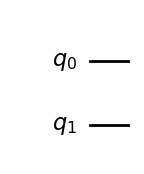

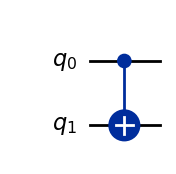

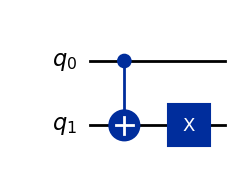

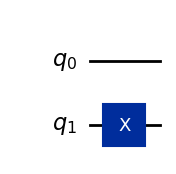

In [3]:
display(deutsch_function(1).draw('mpl'))
display(deutsch_function(2).draw('mpl'))
display(deutsch_function(3).draw('mpl'))
display(deutsch_function(4).draw('mpl'))

In [4]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in Deutsch's algorithm.
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n + 1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

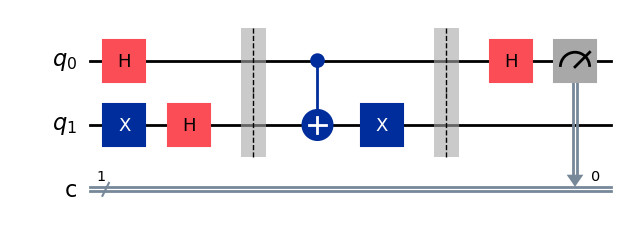

In [6]:
display(compile_circuit(deutsch_function(3)).draw('mpl'))

In [7]:
def deutsch_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch function is constant or balanced.
    """
    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == "0":
        return "constant"
    return "balanced"

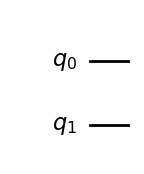

'constant'

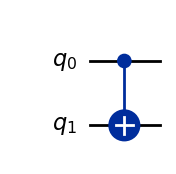

'balanced'

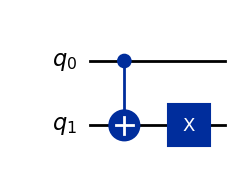

'balanced'

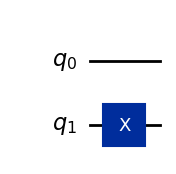

'constant'

In [13]:
for i in range(1, 5):
    f = deutsch_function(i)
    display(f.draw('mpl'))
    display(deutsch_algorithm(f))